# Homework 1

# A fashionable use case : clothing classification with `fashion-mnist`

- Load data with `fashion_mnist.load_data()` 
- There is no validation set, only a train and test set. 
- The labels correspond to the following things

| Label number | Label name  |
|--------------|-------------|
| 0	           | T-shirt/top |
| 1	           | Trouser     |
| 2	           | Pullover    |
| 3	           | Dress       |
| 4	           | Coat        |
| 5	           | Sandal      |
| 6	           | Shirt       |
| 7	           | Sneaker     |
| 8	           | Bag         |
| 9	           | Ankle boot  |

## Your job

- Try to understand the data, visualize it, like we did before with MNIST and noMNIST
- Create a neural network, using the ideas from before, that classify accurately the clothes on the test set
- You will need to build a validation set from the train set in order to tune hyperparameters

## We want to see the following things

- Some learning curves (training) and the accuracy obtained on the test set for the architecture you considered
- A discussion about the impact of the hyperparameters on the accuracy (size of the kernels, number of kernels, number of layers, etc.) 
- A clear comparison between your solutions (a table, or plots comparing the results obtained with different hyper-parameters and different architectures)
- An explanation of what kind of clothes are hard to distinguish and why (some visual explanation)
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did serious comparisons between different architectures
- You can do everything on your laptop, but it might be a good idea to use google `colab` (https://colab.research.google.com/) to get free access to a GPU
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Send your work using the following google form :

- https://forms.gle/G3Rwfcuj3MZfgXhr8

(you will need to create a google account if you don't have one).

## Example of architecture

As a start, you can use the following architecture (but you can and will change it) :

- Convolutional layer with 64 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 128 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 256 filters and 3 * 3 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Dense layer with 256 units
- Dropout with probability 0.5
- Dense output layer with softmax activation

In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import image
from keras.optimizers import SGD

In [33]:
# Loading of fashion_mnist dataset, creation of list for dataset string labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot']

### The MNIST Fashion dataset contains 70,000 images. 60,000 are used in the training set and 10,000 in the testing set. 

In [34]:
# Analysis of shape of datasets
print('Train set: X = %s, y = %s' % (train_images.shape, train_labels.shape))
print("\n")
print('Test set: X = %s, y = %s' % (test_images.shape, test_labels.shape))

Train set: X = (60000, 28, 28), y = (60000,)


Test set: X = (10000, 28, 28), y = (10000,)


### By displaying one example of the train images, we see that the pixel values range from 0 to 255. Before we can start training any model we need to normalize the pixel values to a range of 0 to 1

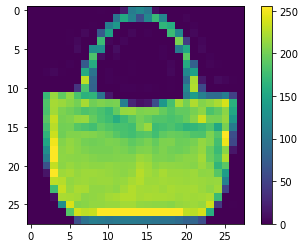

Label for training example # 100: Bag


In [35]:
selected_ex = 100
plt.figure()
plt.imshow(train_images[selected_ex])
plt.colorbar()
plt.grid(False)
plt.show()
#This is a bag so should be type 8
print("Label for training example # %i: %s" %(selected_ex, class_names[train_labels[selected_ex]]))

In [36]:
# Normalization of pixel values of images from 0-255 to 0-1

def pixel_normalization(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

train_images, test_images = pixel_normalization(train_images, test_images)

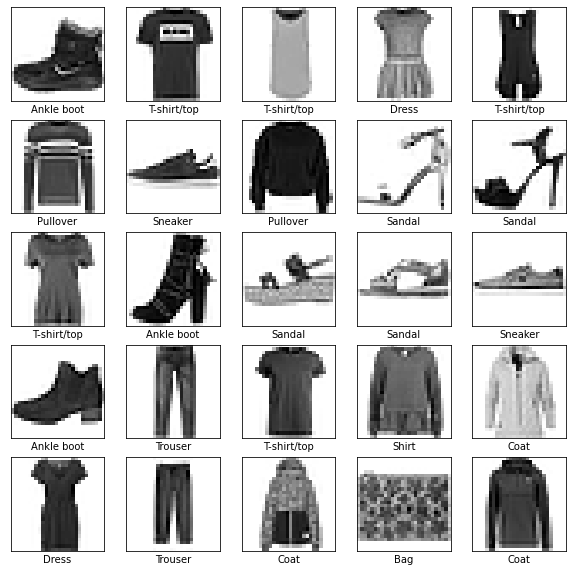

In [37]:
# Display of first 25 items in the dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
# Reshaping of dataset to use only one color channel and be able to train a model

def dataset_reshape(trainX, trainY, testX, testY):
    # reshape dataset to have a single color channel as they are greyscale
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values for labelling
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

train_images, train_labels, test_images, test_labels = dataset_reshape(train_images, 
                                                                       train_labels, 
                                                                       test_images,
                                                                       test_labels) 


# CNN Models

In [8]:
#defining the model

def define_model1():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    #model.add(Dropout(0.25))
    #model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    #model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [9]:
model1 = model1()

In [10]:
modelhistory = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4433 - accuracy: 0.8524 - val_loss: 0.3338 - val_accuracy: 0.8849
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3010 - accuracy: 0.8942 - val_loss: 0.3107 - val_accuracy: 0.8890
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2681 - accuracy: 0.9053 - val_loss: 0.2755 - val_accuracy: 0.9022
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2433 - accuracy: 0.9140 - val_loss: 0.2703 - val_accuracy: 0.9017
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2274 - accuracy: 0.9186 - val_loss: 0.2987 - val_accuracy: 0.8932
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2142 - accuracy: 0.9239 - val_loss: 0.2821 - val_accuracy: 0.8980
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1997 - accuracy: 0.9286 - val_loss: 0.2788 -

In [11]:
#hopefully saves model
model1.save('finalmodel1.h5')

# Accuracy and loss graph

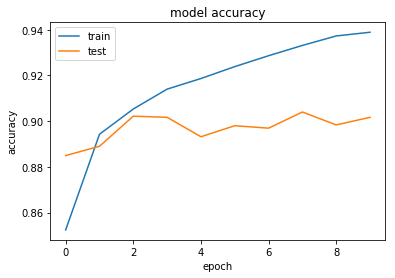

In [12]:
#display the accuracy on the train and validation set
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

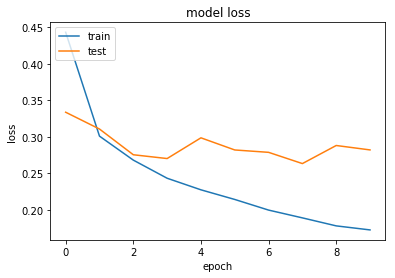

In [13]:
#displays the loss on the training and validation set
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Even though on the training set the accuracy is very good, on the training set it goes up and then stagnates around the third epoch which means that we have overfitted our model!

# Accuracy

In [14]:
#Looking at accuracy on the test dataset

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2986 - accuracy: 0.8978

Test accuracy: 0.8978000283241272


# Predictions

In [15]:
#seeing if the 300th image is correctly predicted in the test set
img = test_images[300]
img = img.reshape(1, 28, 28, 1)
result =model.predict(img)
print("Label number:", np.argmax(result),"\n","Certainty:",np.max(result))

Label number: 3 
 Certainty: 0.99983764


In [16]:
np.argmax(test_labels[300])

3

So here the prediction is correct

In [17]:
test_images[1].shape

(28, 28, 1)

In [18]:
#all predicted labels in test set

a = []
for i in range(len(test_images)):
    img = test_images[i]
    img = img.reshape(1,28,28,1)
    result =model.predict(img)
    a.append(np.argmax(result))

# What clothes are hard to distinguish

In [19]:
#all actual labels in test set
b = []
for i in range(len(test_labels)):
    result = test_labels[i]
    b.append(np.argmax(result))
     

In [20]:
#c is an array of incorrect predictions and d is an array of the labels that were not predicted correctly
c = []
d = []

for i in range(len(a)):
    if a[i]!=b[i]:
        c.append(a[i])
        d.append(b[i])

#pairs is just turning the two arrays c and d into 1 in order to count the occurrences
pairs = np.column_stack((c, d))
pairs = pairs.tolist()

In [21]:
#need to fix this but basically this shows the frequency of what is incorrectly predicted instead of what should be
for i in range(10):
    for j in range(10):
        print("Bad pred",i,"Label not pred correctly",j,"Error frequency",pairs.count([i,j]))

Bad pred 0 Label not pred correctly 0 Error frequency 0
Bad pred 0 Label not pred correctly 1 Error frequency 1
Bad pred 0 Label not pred correctly 2 Error frequency 25
Bad pred 0 Label not pred correctly 3 Error frequency 13
Bad pred 0 Label not pred correctly 4 Error frequency 2
Bad pred 0 Label not pred correctly 5 Error frequency 0
Bad pred 0 Label not pred correctly 6 Error frequency 138
Bad pred 0 Label not pred correctly 7 Error frequency 0
Bad pred 0 Label not pred correctly 8 Error frequency 4
Bad pred 0 Label not pred correctly 9 Error frequency 0
Bad pred 1 Label not pred correctly 0 Error frequency 3
Bad pred 1 Label not pred correctly 1 Error frequency 0
Bad pred 1 Label not pred correctly 2 Error frequency 1
Bad pred 1 Label not pred correctly 3 Error frequency 6
Bad pred 1 Label not pred correctly 4 Error frequency 1
Bad pred 1 Label not pred correctly 5 Error frequency 0
Bad pred 1 Label not pred correctly 6 Error frequency 1
Bad pred 1 Label not pred correctly 7 Error 

In [22]:
#maybe do graph instead of printing ^

This means that the most often errors are that Label 6 is predicted instead of a Label 0 (155 occurrences)(Shirt instead of a T-shirt/top), that Label 4 is predicted instead of a Label 2 (143 occurrences) (Coat instead of pullover) and Label 6 instead of a Label 2 (125 occurrences) (Shirt instead of pullover).

In [23]:
#show examples (photos) of these three most common classification errors